In [24]:
import pandas as pd
import statsmodels.api as sm

In [25]:
data = pd.read_csv("churn_clean.csv")
columns = ['State','Population', 'Area','Age','Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Yearly_equip_failure',
       'Techie', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport','Bandwidth_GB_Year']


In [26]:
new_data = pd.DataFrame(data[columns])
new_data.isna().sum()

State                      0
Population                 0
Area                       0
Age                        0
Marital                    0
Gender                     0
Outage_sec_perweek         0
Email                      0
Yearly_equip_failure       0
Techie                     0
InternetService         2129
OnlineBackup               0
DeviceProtection           0
TechSupport                0
Bandwidth_GB_Year          0
dtype: int64

In [27]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [28]:
data.duplicated().sum()

0

In [29]:
new_data = new_data.dropna()
new_data

,State,Population,Area,Age,Marital,Gender,Outage_sec_perweek,Email,Yearly_equip_failure,Techie,InternetService,OnlineBackup,DeviceProtection,TechSupport,Bandwidth_GB_Year
0,AK,38,Urban,68,Widowed,Male,7.978323,10,1,No,Fiber Optic,Yes,No,No,904.536110
1,MI,10446,Urban,27,Married,Female,11.699080,12,1,Yes,Fiber Optic,No,No,No,800.982766
2,OR,3735,Urban,50,Widowed,Female,10.752800,9,1,Yes,DSL,No,No,No,2054.706961
3,CA,13863,Suburban,48,Married,Male,14.913540,15,0,Yes,DSL,No,No,No,2164.579412
4,TX,11352,Suburban,83,Separated,Male,8.147417,16,1,No,Fiber Optic,No,No,Yes,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VT,640,Rural,23,Married,Male,9.415935,12,0,No,DSL,Yes,Yes,No,6511.252601
9996,TN,77168,Rural,48,Divorced,Male,6.740547,15,0,No,Fiber Optic,Yes,Yes,No,5695.951810
9997,TX,406,Rural,48,Never Married,Female,6.590911,10,0,No,Fiber Optic,Yes,No,No,4159.305799
9998,GA,35575,Urban,39,Separated,Male,12.071910,14,0,No,Fiber Optic,No,No,Yes,6468.456752


### Converting Categorical Variables

In [30]:
yes_no = ["Techie", "OnlineBackup", "DeviceProtection", "TechSupport"]
new_data[yes_no] = data[yes_no].replace(["Yes","No"],[1,0])
new_data[yes_no]

,Techie,OnlineBackup,DeviceProtection,TechSupport
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
9995,0,1,1,0
9996,0,1,1,0
9997,0,1,0,0
9998,0,0,0,1


In [31]:
dummy_columns = ["State","Area", "Marital", "Gender", "InternetService"]
new_data[dummy_columns] = new_data[dummy_columns].astype('category')
new_data = pd.get_dummies(new_data, columns= dummy_columns, dtype=int, drop_first= True)
new_data

,Population,Age,Outage_sec_perweek,Email,Yearly_equip_failure,Techie,OnlineBackup,DeviceProtection,TechSupport,Bandwidth_GB_Year,...,State_WY,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,InternetService_Fiber Optic
0,38,68,7.978323,10,1,0,1,0,0,904.536110,...,0,0,1,0,0,0,1,1,0,1
1,10446,27,11.699080,12,1,1,0,0,0,800.982766,...,0,0,1,1,0,0,0,0,0,1
2,3735,50,10.752800,9,1,1,0,0,0,2054.706961,...,0,0,1,0,0,0,1,0,0,0
3,13863,48,14.913540,15,0,1,0,0,0,2164.579412,...,0,1,0,1,0,0,0,1,0,0
4,11352,83,8.147417,16,1,0,0,0,1,271.493436,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,23,9.415935,12,0,0,1,1,0,6511.252601,...,0,0,0,1,0,0,0,1,0,0
9996,77168,48,6.740547,15,0,0,1,1,0,5695.951810,...,0,0,0,0,0,0,0,1,0,1
9997,406,48,6.590911,10,0,0,1,0,0,4159.305799,...,0,0,0,0,1,0,0,0,0,1
9998,35575,39,12.071910,14,0,0,0,0,1,6468.456752,...,0,0,1,0,0,1,0,1,0,1


In [32]:
new_data.to_csv("LR_Model_Dataset.csv")

### First Model

In [33]:
X = pd.DataFrame(new_data)
y = new_data["Outage_sec_perweek"]
X = X.drop(columns="Outage_sec_perweek")

In [34]:
X

,Population,Age,Email,Yearly_equip_failure,Techie,OnlineBackup,DeviceProtection,TechSupport,Bandwidth_GB_Year,State_AL,...,State_WY,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,InternetService_Fiber Optic
0,38,68,10,1,0,1,0,0,904.536110,0,...,0,0,1,0,0,0,1,1,0,1
1,10446,27,12,1,1,0,0,0,800.982766,0,...,0,0,1,1,0,0,0,0,0,1
2,3735,50,9,1,1,0,0,0,2054.706961,0,...,0,0,1,0,0,0,1,0,0,0
3,13863,48,15,0,1,0,0,0,2164.579412,0,...,0,1,0,1,0,0,0,1,0,0
4,11352,83,16,1,0,0,0,1,271.493436,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,23,12,0,0,1,1,0,6511.252601,0,...,0,0,0,1,0,0,0,1,0,0
9996,77168,48,15,0,0,1,1,0,5695.951810,0,...,0,0,0,0,0,0,0,1,0,1
9997,406,48,10,0,0,1,0,0,4159.305799,0,...,0,0,0,0,1,0,0,0,0,1
9998,35575,39,14,0,0,0,0,1,6468.456752,0,...,0,0,1,0,0,1,0,1,0,1


In [35]:
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Outage_sec_perweek   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1187.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                        0.00
Time:                        07:10:07   Log-Likelihood:                         -20010.
No. Observations:                7871   AIC:                                  4.016e+04
Df Residuals:                    7802   BIC:                                  4.064e+04
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Population                   4.485e-06   2.58e-06      1.736      0.083    -5.8e-07    9.55e-06
Age                             0.0024      0.002      1.461      0.144      -0.001       0.006
Email                           0.0873      0.011      7.896      0.000       0.066       0.109
Yearly_equip_failure            0.0310      0.055      0.563      0.573      -0.077       0.139
Techie                          0.1361      0.093      1.461      0.144      -0.047       0.319
OnlineBackup                    0.1116      0.070      1.590      0.112      -0.026       0.249
DeviceProtection                0.2275      0.070      3.234      0.001       0.090       0.365
TechSupport                     0.0415      0.072      0.575      0.565      -0.100       0.183
Bandwidth_GB_Year            5.798e-05   1.59e-05      3.642      0.000    2.68e-05    8.92e-05
State_AL                        8.1706      0.314     26.055      0.000       7.556       8.785
State_AR                        8.0365      0.316     25.462      0.000       7.418       8.655
State_AZ                        7.6266      0.402     18.953      0.000       6.838       8.415
State_CA                        7.6528      0.249     30.777      0.000       7.165       8.140
State_CO                        7.5275      0.341     22.066      0.000       6.859       8.196
State_CT                        7.9469      0.456     17.438      0.000       7.054       8.840
State_DC                        9.6397      0.997      9.670      0.000       7.686      11.594
State_DE                        8.0453      0.795     10.125      0.000       6.488       9.603
State_FL                        7.8714      0.279     28.235      0.000       7.325       8.418
State_GA                        8.1408      0.297     27.389      0.000       7.558       8.723
State_HI                        7.7109      0.605     12.738      0.000       6.524       8.898
State_IA                        8.0375      0.280     28.666      0.000       7.488       8.587
State_ID                        8.5352      0.438     19.506      0.000       7.677       9.393
State_IL                        7.8181      0.253     30.853      0.000       7.321       8.315
State_IN                        7.8942      0.294     26.809      0.000       7.317       8.471
State_KS                        7.9052      0.312     25.308      0.000       7.293       8.518
State_KY                        7.6620      0.286     26.750      0.000       7.101       8.223
State_LA                        7.6904      0.342     22.498      0.000       7.020       8.360
State_MA                        7.9316      0.321     24.698      0.000       7.302       8.561
State_MD

### Model 2

In [36]:
def back_test(X,y,significance_level = 0.05):
    num_vars = len(X.columns)
    for i in range(num_vars):
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            excluded_feature = regressor_OLS.pvalues.idxmax()
            print(f"Removing feature '{excluded_feature}' with p-value: {max_p_value}")
            X = X.drop(columns=[excluded_feature])
        else:
            break

    return X

In [37]:
new_X = back_test(X,y)
model2 = sm.OLS(y,new_X).fit()

Removing feature 'Marital_Never Married' with p-value: 0.5838055379408921
Removing feature 'Yearly_equip_failure' with p-value: 0.5714538499263448
Removing feature 'TechSupport' with p-value: 0.5619935558133387
Removing feature 'Gender_Nonbinary' with p-value: 0.5508978233604394
Removing feature 'Marital_Widowed' with p-value: 0.21388355537344125
Removing feature 'Marital_Separated' with p-value: 0.1428603591860288
Removing feature 'Age' with p-value: 0.13177373113682986
Removing feature 'Techie' with p-value: 0.12890436597922103
Removing feature 'OnlineBackup' with p-value: 0.09911729499503094
Removing feature 'Population' with p-value: 0.07923500494560244
Removing feature 'Gender_Male' with p-value: 0.06284490548539504


In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Outage_sec_perweek   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1410.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):                        0.00
Time:                        07:10:08   Log-Likelihood:                         -20019.
No. Observations:                7871   AIC:                                  4.015e+04
Df Residuals:                    7813   BIC:                                  4.056e+04
Df Model:                          58                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Email                           0.0909      0.011      8.258      0.000       0.069       0.112
DeviceProtection                0.2394      0.070      3.408      0.001       0.102       0.377
Bandwidth_GB_Year             6.11e-05   1.59e-05      3.845      0.000    2.99e-05    9.23e-05
State_AL                        8.5320      0.296     28.842      0.000       7.952       9.112
State_AR                        8.3832      0.297     28.192      0.000       7.800       8.966
State_AZ                        8.0161      0.388     20.657      0.000       7.255       8.777
State_CA                        8.0799      0.219     36.926      0.000       7.651       8.509
State_CO                        7.9029      0.323     24.449      0.000       7.269       8.537
State_CT                        8.3612      0.441     18.950      0.000       7.496       9.226
State_DC                       10.0245      0.991     10.111      0.000       8.081      11.968
State_DE                        8.3902      0.788     10.648      0.000       6.846       9.935
State_FL                        8.3192      0.251     33.200      0.000       7.828       8.810
State_GA                        8.5358      0.276     30.922      0.000       7.995       9.077
State_HI                        8.1010      0.596     13.587      0.000       6.932       9.270
State_IA                        8.3959      0.259     32.374      0.000       7.888       8.904
State_ID                        8.8645      0.426     20.797      0.000       8.029       9.700
State_IL                        8.1791      0.231     35.367      0.000       7.726       8.632
State_IN                        8.2581      0.275     30.045      0.000       7.719       8.797
State_KS                        8.2539      0.294     28.041      0.000       7.677       8.831
State_KY                        8.0131      0.268     29.948      0.000       7.489       8.538
State_LA                        8.0595      0.325     24.822      0.000       7.423       8.696
State_MA                        8.2978      0.304     27.316      0.000       7.702       8.893
State_MD                        8.1797      0.345     23.705      0.000       7.503       8.856
State_ME                        8.3424      0.376     22.199      0.000       7.606       9.079
State_MI                        8.0705      0.260     31.075      0.000       7.561       8.580
State_MN                        8.4138      0.269     31.319      0.000       7.887       8.940
State_MO                        8.3040      0.254     32.629      0.000       7.805       8.803
State_MS                        8.5548      0.343     24.920      0.000       7.882       9.228
State_MT

### Comparison

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot

In [40]:
rse1 = np.sqrt(model1.mse_resid)
rse1

3.088446258555574

In [41]:
rse2 = np.sqrt(model2.mse_resid)
rse2

3.0899972306969916

In [42]:
y_pred_model1 = model1.predict(X)
y_pred_model2 = model2.predict(new_X)

resid1 =  y - y_pred_model1
resid2 = y - y_pred_model2

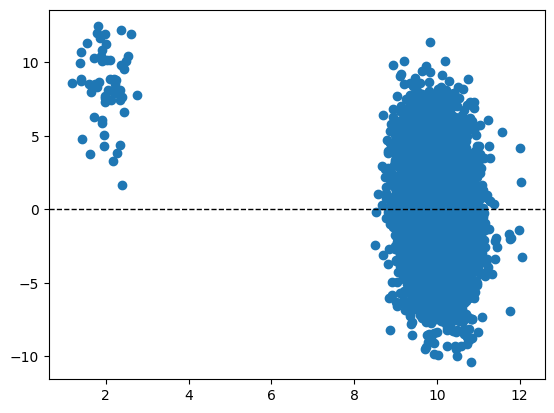

In [43]:
plt.scatter(y_pred_model1, resid1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

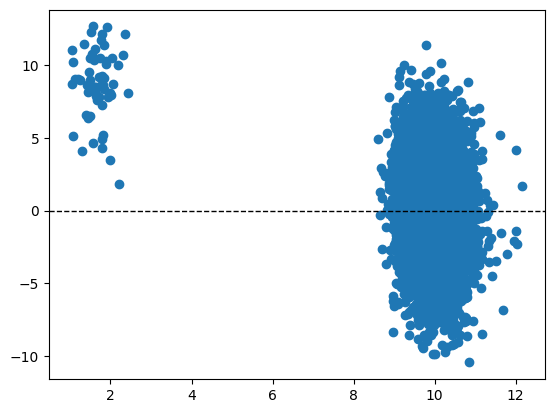

In [44]:
plt.scatter(y_pred_model2, resid2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

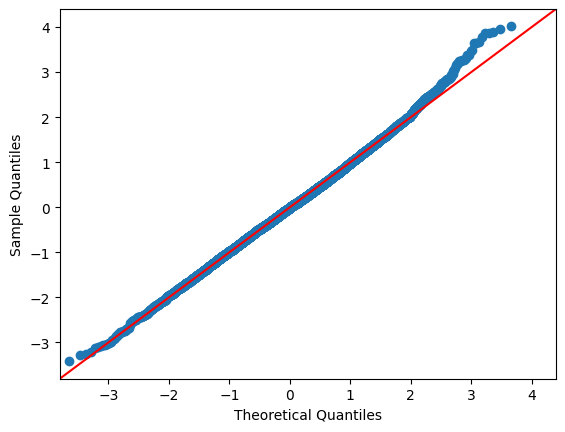

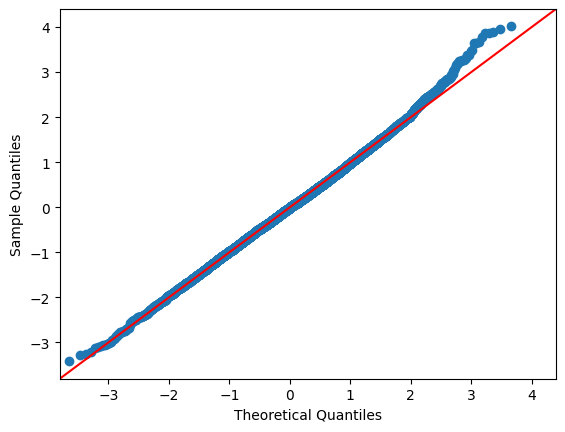

In [45]:
from statsmodels.api import qqplot
qqplot(data = model1.resid, fit= True, line="45")

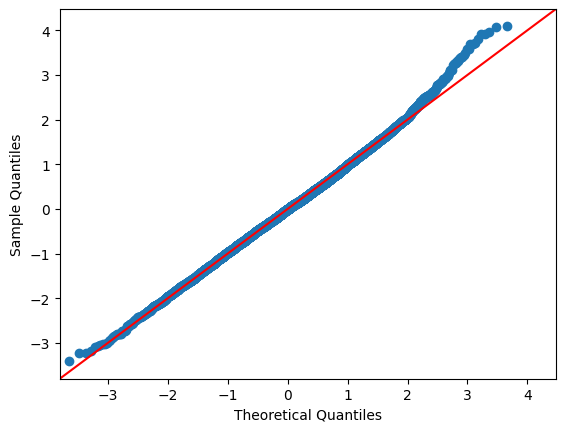

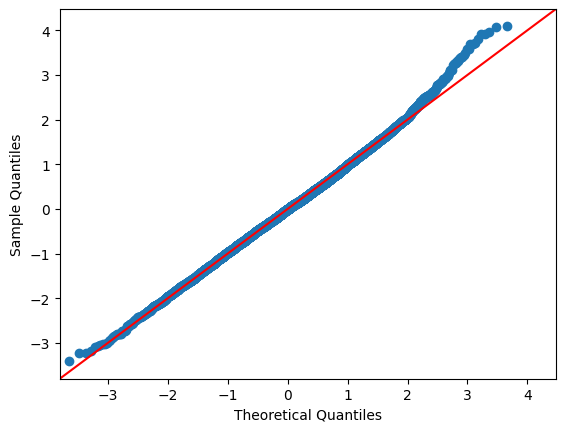

In [46]:
qqplot(data = model2.resid, fit= True, line="45")